# 03 `matplotlib` примитивы

In [1]:
#! /usr/bin/env pthon3
# -*- coding: utf-8 -*-

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
plt.style.use('black_white.mplstyle')

## Создание примитивов

Под термином примитив понимаются простейшие геометрические объекты: отрезки, окружности, треугольники и прямоугольники. Для их рисования можно использовать специальные методы, которые позволят, например, добавить на рисунок окружность, указав лишь координаты ее центра и радиус. В `matplotlib` функции для создания примитивов находятся в подмодуле `patches` и `lines`.

Перечислим некоторые из функций подмодуля `patches`.
- `Circle` --- создает окружность с центром в точке с координатами `xy` и радиусом `radius`.
- `Ellipse` --- создает эллипс с центром с координатами `xy` и полуосями `width` и `height`.
- `Rectangle` --- создает прямоугольник, левый нижний край которого имеет координаты `xy`. Высота и ширина прямоугольника регулируется параметрами `width` и `height`, а также его можно вращать вокруг левого нижнего угла задав параметр `angle` (в градусах).
- `Arc` --- создает дугу эллипса. Кроме параметров самого эллипса (см. `Ellipse`), принимает параметры `theta1` и `theta2`, которые задают начальный и конечный углы дуги, а также параметр `angle`, который позволяет вращать дугу вокруг центра как единное целое.
- `Wedge` --- создает клин (сегмент окружности) с центром в точке `center` и радиусом `r`. Отличие от дуги эллипса `Arc` заключается в прорисовке радиусов. Размер центрального угла задается параметрами `theta1` и `theta2`, также как у дуги эллипса.
- `Polygon` ломанная линия (замкнутая или не замкнутая) произвольного вида, задаваемая массивом координат `xy`. Принимает логический параметр `closed`, который отключает или включает автоматическое замыкание ломанной (соединяет начальную и последнюю точки).
- `Arrow` и `FancyArrow` --- создают стрелку с началом в точке с координатами `x`, `y` и проекциями длины `dx` по оси $Ox$ и `dy` по оси $Oy$. `FancyArrow` в добавок позволяет более гибко настроить внешний вид стрелки.
- `FancyBboxPatch` --- создает прямоугольник со скругленными краями.

Каждая из вышеперечисленных функций принимает в качестве необязательных параметров стандартные аргументы, управляющие внешним видом линии: `linestyle`, `linewidth`, `color` и т.д. Особенно полезен логический аргумент `fill` который включает или отключает заливку фигуры сплошным цветом.

После создания примитива его необходимо добавить на изображения. Для этого используется метод `add_patch` объекта `axes`. Пример ниже показывает использование всех вышеперечисленных примитивов.

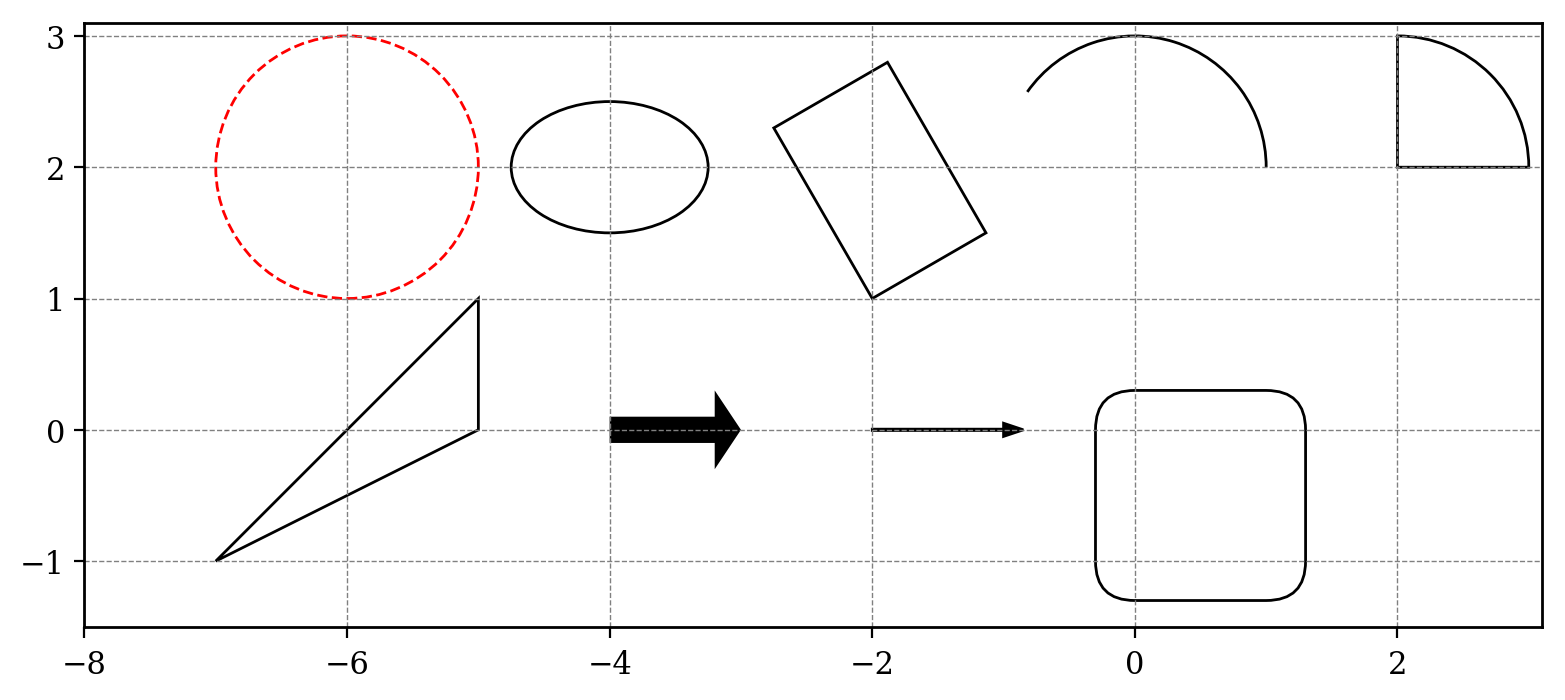

In [4]:
fig11 = plt.figure(num=11)
ax11 = fig11.add_subplot(1, 1, 1)

ax11.set_xlim(left=-8, right=3.1)
ax11.set_ylim(bottom=-1.5, top=3.1)

ax11.set_aspect('equal')
# можно использовать универсальный метод set
# ax11.set(xlim=(-2, 2), ylim=(-2, 2), aspect='equal')

# Окружность
circle = mpatches.Circle(xy=(-6, 2), radius = 1, color='red', linestyle='--', fill=False)
# Дуга эллипса
elipse = mpatches.Ellipse(xy=(-4, 2), width=1.5, height=1, fill=False)
# Прямоугольник
rectangle = mpatches.Rectangle(xy=(-2, 1), width=1, height=1.5, angle=30, fill=False)
# Арка эллипса
arc = mpatches.Arc(xy=(0, 2), width=2, height=2, angle=0, theta1=0, theta2=145)
# Сегмент окрудности (клин)
wedge = mpatches.Wedge(center=(2, 2), r=1, theta1=0, theta2=90, fill=False)
# Полигон -- ломанная линия (замкнутая или не замкнутая) произвольного вида.
polygon = mpatches.Polygon(xy=np.array([[-7, -1], [-5, 1], [-5, 0]]), closed=True, fill=False)
# Стрелка
arrow = mpatches.Arrow(x=-4, y=0, dx=1, dy=0)
# Стрелка с возможностью настройки внешнего вида
farrow = mpatches.FancyArrow(x=-2, y=0, dx=1, dy=0, width=0.01, head_width=0.1)
# Прямоугольник c закругленными углами
fbox = mpatches.FancyBboxPatch(xy=(0, -1), width=1, height=1.0, fill=False)

ax11.add_patch(circle)
ax11.add_patch(elipse)
ax11.add_patch(rectangle)
ax11.add_patch(arc)
ax11.add_patch(wedge)
ax11.add_patch(polygon)
ax11.add_patch(arrow)
ax11.add_patch(farrow)
ax11.add_patch(fbox)

fig11.savefig('img11.pdf', format='pdf', bbox_inches='tight', pad_inches=0)

В подмодуле `lines` находятся низкоуровневые функции, применяемые для соединения точек ломанными или гладкими кривыми разного порядка. Из всех этих функций, мы рассмотрим лишь одну --- `Line2D`. Данная функция принимает два массива координат: по оси $Ox$ (`xdata`) и по оси $Oy$ (`ydata`). Кроме этих параметров, есть возможность очень гибко настроить вид линии. В примере ниже мы добавили параметр `marker`, который добавляет маркеры в каждой из вершин получившейся ломанной.

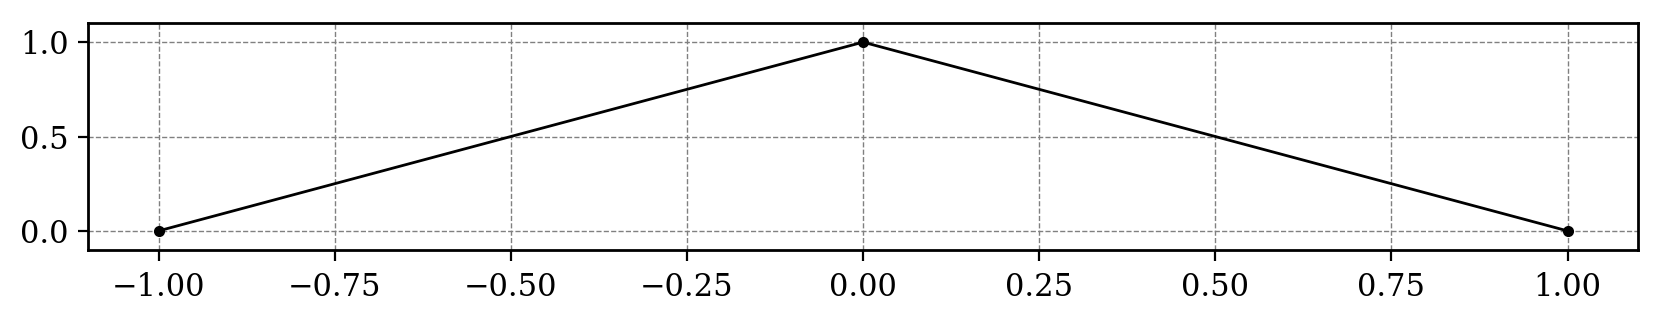

In [5]:
fig12 = plt.figure(num=12, figsize=(10, 1.5))
ax12 = fig12.add_subplot(1, 1, 1)

ax12.set_xlim(left=-1.1, right=1.1)
ax12.set_ylim(bottom=-0.1, top=1.1)

dots = {'xdata': [-1, 0, 1], 'ydata': [0, 1, 0]}
line = mlines.Line2D(**dots, marker='o')

ax12.add_line(line)

Обратите внимание, что мы сперва создали словарь `dots`, а потом передали его в функцию c помощью оператора `**`. Данный оператор распаковывает словарь и передает в функцию именованные аргументы с теми же именами, что и ключи словаря. Это полезно в случае, если мы вычисляем точки ломанной отдельно, например, считываем из файла или получаем в `JSON`-формате. Естественно, что можно обойтись более стандартным синтаксисом и записать следующий код:
```python
xs = [-1, 0, 1]
ys = [0, 1, 0]
line = mlines.Line2D(xdata=xs, ydata=ys, marker='o')
```

In [6]:
fig12.savefig('img12.pdf', format='pdf', bbox_inches='tight', pad_inches=0)